In [4]:
from models.candlestick import Candlestick
import pandas as pd
import numpy as np


candlestick = Candlestick()

df = candlestick.to_df()

df

,open,high,close,low,volumn
date,,,,,
2019-10-04,8224.43,8232.41,8137.13,8005.00,26476.3
2019-10-05,8137.09,8183.41,8126.19,8012.98,21907.6
2019-10-06,8127.55,8153.87,7854.25,7785.00,34676.1
2019-10-07,7855.30,8299.92,8190.09,7762.00,52202.1
2019-10-08,8190.82,8325.00,8168.39,8088.75,35452.7
...,...,...,...,...,...
2021-02-10,46420.40,47310.00,44807.60,43727.00,97154.2
2021-02-11,44807.60,48678.90,47969.50,43994.00,89561.1
2021-02-12,47968.70,48985.80,47287.60,46125.00,85870.0


In [2]:
def logDiff(x):
    x_diff = 100*np.log(x/x.shift(1))
    return x_diff

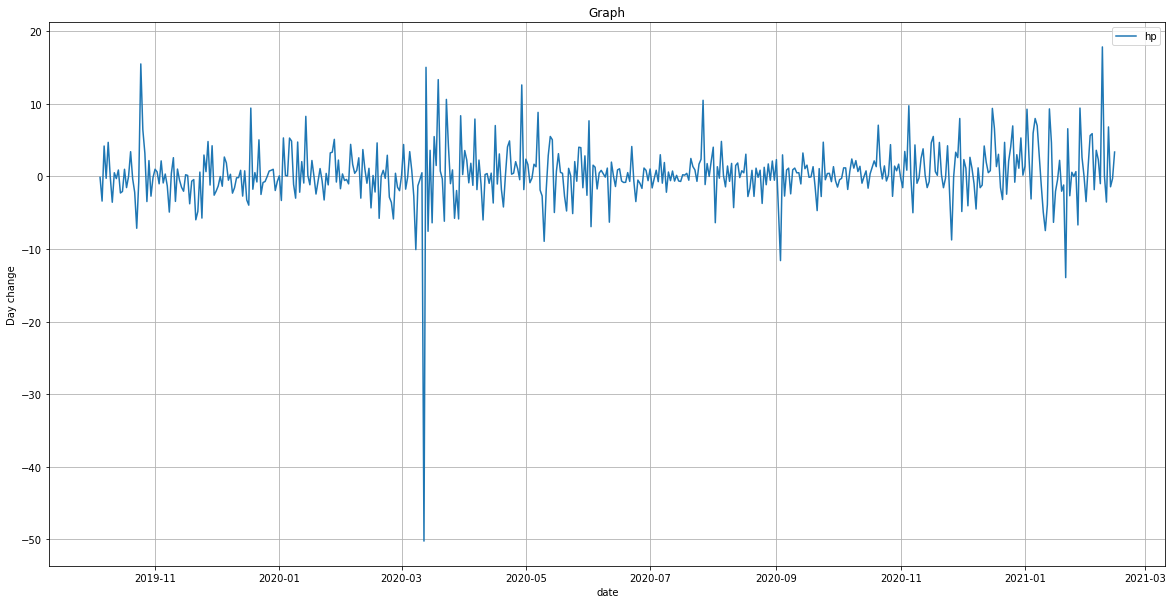

<AxesSubplot:>

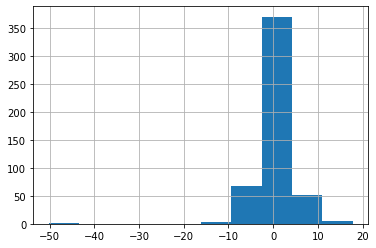

In [7]:
data = logDiff(df['close'])

import matplotlib.pyplot as plt 

plt.figure(figsize=(20,10))

plt.plot(data, label='hp')

plt.xlabel('date')
plt.ylabel('Day change')
plt.title('Graph')
plt.grid(True)

plt.legend()
plt.show()

data.hist()